<a href="https://colab.research.google.com/github/IST407-707/707-warm-up-assignment-2-trent335/blob/master/completed_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [2]:
#pip install pandas
import pandas as pan
data_link = 'https://raw.githubusercontent.com/trent335/707-lecture-master/main/1-week1/data/2019_Yellow_Taxi_Trip_Data.csv'
TaxiDF = pan.read_csv(data_link)
TaxiDF.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [3]:
TaxiDF.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [4]:
designated_columns = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
TaxiDF[designated_columns].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 4

Count the number of NAs in each column.

In [5]:
TaxiDF.isna().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

array([[<Axes: xlabel='passenger_count', ylabel='passenger_count'>,
        <Axes: xlabel='trip_distance', ylabel='passenger_count'>,
        <Axes: xlabel='payment_type', ylabel='passenger_count'>,
        <Axes: xlabel='fare_amount', ylabel='passenger_count'>,
        <Axes: xlabel='extra', ylabel='passenger_count'>,
        <Axes: xlabel='mta_tax', ylabel='passenger_count'>,
        <Axes: xlabel='tip_amount', ylabel='passenger_count'>,
        <Axes: xlabel='tolls_amount', ylabel='passenger_count'>,
        <Axes: xlabel='improvement_surcharge', ylabel='passenger_count'>,
        <Axes: xlabel='total_amount', ylabel='passenger_count'>,
        <Axes: xlabel='congestion_surcharge', ylabel='passenger_count'>],
       [<Axes: xlabel='passenger_count', ylabel='trip_distance'>,
        <Axes: xlabel='trip_distance', ylabel='trip_distance'>,
        <Axes: xlabel='payment_type', ylabel='trip_distance'>,
        <Axes: xlabel='fare_amount', ylabel='trip_distance'>,
        <Axes: xlabel='

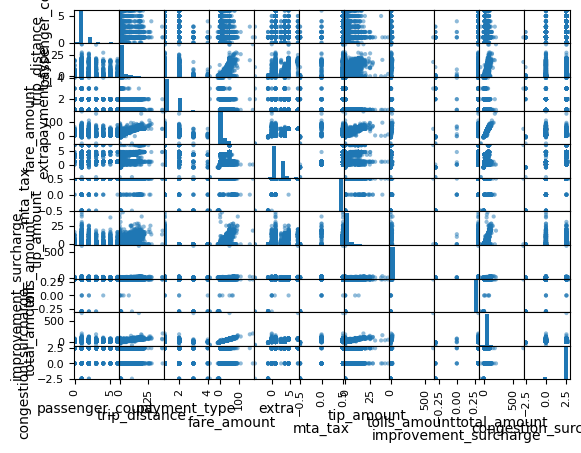

In [6]:
import pandas as pan
from pandas.plotting import scatter_matrix
data_link = 'https://raw.githubusercontent.com/trent335/707-lecture-master/main/1-week1/data/2019_Yellow_Taxi_Trip_Data.csv'
TaxiDF = pan.read_csv(data_link)
dropped_id_columns = ['vendorid', 'ratecodeid', 'pulocationid', 'dolocationid']
new_TaxiDF = TaxiDF.drop(columns = dropped_id_columns)
dates = new_TaxiDF.select_dtypes(include='datetime64').columns
new_TaxiDF_nodates = new_TaxiDF.drop(columns = dates)
scatter_matrix(new_TaxiDF_nodates)

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

array([[<Axes: xlabel='total_amount', ylabel='total_amount'>]],
      dtype=object)

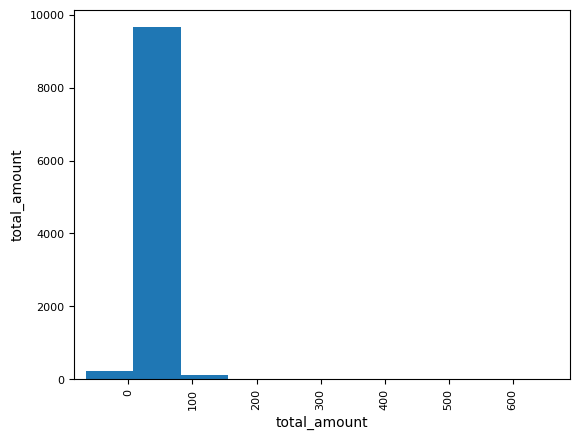

In [7]:
scatter_matrix(new_TaxiDF_nodates[['total_amount']])

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features.

In [8]:
from sklearn.model_selection import train_test_split

prohibited_variables = ['total_amount', 'tip_amount']
numeric_variables = new_TaxiDF_nodates.select_dtypes(include = 'number')
numeric_columns = numeric_variables.columns
numeric_TaxiDF = new_TaxiDF_nodates[numeric_columns]
permitted_TaxiDF = numeric_TaxiDF.drop(columns = prohibited_variables)
dependent_variable = permitted_TaxiDF['fare_amount']
independent_variables = permitted_TaxiDF[['trip_distance', 'payment_type', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']]

independent_variables_train, independent_variables_test, dependent_variable_train, dependent_variable_test = train_test_split(independent_variables, dependent_variable, test_size=0.5, random_state=30)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(independent_variables_train, dependent_variable_train)

model_predictions = linear_model.predict(independent_variables_test)

from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(dependent_variable_test, model_predictions)
R2 = r2_score(dependent_variable_test, model_predictions)

print('R Squared:', R2)
print('Mean Squared Error', MSE)

R Squared: 0.7775476541474479
Mean Squared Error 40.938978181665625


#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


In [9]:
from sklearn.model_selection import train_test_split

prohibited_variables = ['total_amount', 'tip_amount']
numeric_variables = new_TaxiDF_nodates.select_dtypes(include = 'number')
numeric_columns = numeric_variables.columns
numeric_TaxiDF = new_TaxiDF_nodates[numeric_columns]
permitted_TaxiDF = numeric_TaxiDF.drop(columns = prohibited_variables)
dependent_variable = permitted_TaxiDF['fare_amount']
independent_variables = permitted_TaxiDF[['trip_distance', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']]

independent_variables_train, independent_variables_test, dependent_variable_train, dependent_variable_test = train_test_split(independent_variables, dependent_variable, test_size=0.5, random_state=30)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

tree_regressor = DecisionTreeRegressor(random_state=30)
tree_regressor.fit(independent_variables_train, dependent_variable_train)
tree_predictions = tree_regressor.predict(independent_variables_test)

from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(dependent_variable_test, tree_predictions)
R2 = r2_score(dependent_variable_test, tree_predictions)

print('R Squared:', R2)
print('Mean Squared Error', MSE)

R Squared: 0.841461781651857
Mean Squared Error 29.176553014265746


Here, when exploring the same exact independent variables as Exercise 7, but with the Decision Tree Regressor, the R2 was approximately 0.82, compared to the previous R2 value of approximately 0.78 from the Linear Regression method. Furthermore, the model has more predictive power overall by eliminating the payment_type variable and implementing the Decision Tree Regressor, generating a R2 value of 0.84. Therefore, the Decision Tree Regressor works better. It's possible that the Decision Tree Regressor works better here because it is less sensitive to outliers, and/or the variables may have a nonlinear relationship to one another.